In [3]:
# Import necessary libraries
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_white"
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from textblob import TextBlob

In [4]:
# Load data & overview data head
data = pd.read_csv("instagram_data.csv", encoding = 'latin-1')
print(data.head())

   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learni

In [3]:
# View all columns in dataset
print(data.columns)

Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags'],
      dtype='object')


In [4]:
# View column info
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB
None


In [5]:
# View descriptive stats
print(data.describe())

        Impressions     From Home  From Hashtags  From Explore   From Other  \
count    119.000000    119.000000     119.000000    119.000000   119.000000   
mean    5703.991597   2475.789916    1887.512605   1078.100840   171.092437   
std     4843.780105   1489.386348    1884.361443   2613.026132   289.431031   
min     1941.000000   1133.000000     116.000000      0.000000     9.000000   
25%     3467.000000   1945.000000     726.000000    157.500000    38.000000   
50%     4289.000000   2207.000000    1278.000000    326.000000    74.000000   
75%     6138.000000   2602.500000    2363.500000    689.500000   196.000000   
max    36919.000000  13473.000000   11817.000000  17414.000000  2547.000000   

             Saves    Comments      Shares       Likes  Profile Visits  \
count   119.000000  119.000000  119.000000  119.000000      119.000000   
mean    153.310924    6.663866    9.361345  173.781513       50.621849   
std     156.317731    3.544576   10.089205   82.378947       87.08

In [6]:
# Check data for null values
print(data.isnull().sum())

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64


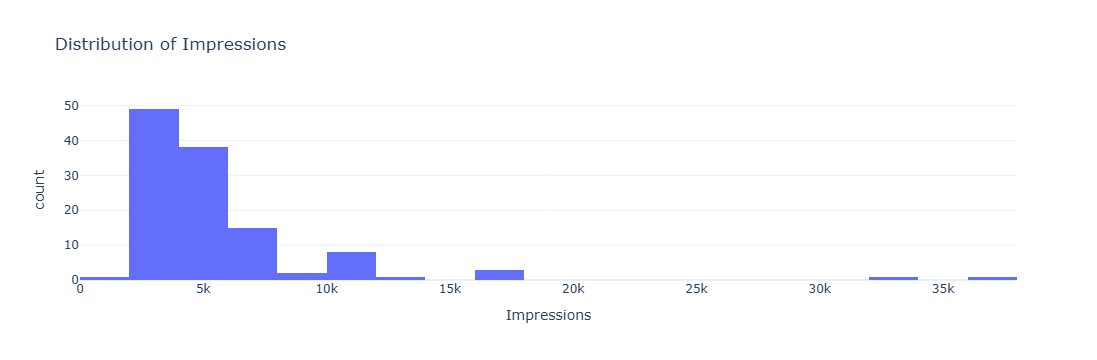

In [40]:
# Create a histogram for the 'Impressions' column

fig = px.histogram(data, 
                   x='Impressions',  # Column to plot
                   nbins = 20, # Number of bins
                   title='Distribution of Impressions')  # Title of the plot

# Display the plot
fig.show()

In [8]:
# Create a line plot showing trend of impressions over time.
fig = px.line(data, 
              x=data.index,  # Use the row index as the x-axis
              y='Impressions',  # Plot the 'Impressions' column on the y-axis
              title='Impressions Over Time')  # Title of the plot

# Display the plot
fig.show()

In [9]:
#Create a multi-line plot that shows the trends of Likes, Saves, and Follows over time.

# Create a figure
fig = go.Figure()

# Add traces for Likes, Saves, and Follows
fig.add_trace(go.Scatter(x=data.index, y=data['Likes'], name='Likes'))
fig.add_trace(go.Scatter(x=data.index, y=data['Saves'], name='Saves'))
fig.add_trace(go.Scatter(x=data.index, y=data['Follows'], name='Follows'))

# Update layout
fig.update_layout(title='Metrics Over Time',
                  xaxis_title='Date',  # Label for the x-axis
                  yaxis_title='Count')  # Label for the y-axis

# Display the scatter plot
fig.show()

In [10]:
# Create a pie chart that visualizes the distribution of reach (impressions) from different sources

# Define the reach sources and their total counts
reach_sources = ['From Home', 'From Hashtags', 'From Explore', 'From Other']
reach_counts = [data[source].sum() for source in reach_sources]

# Define custom colors for the pie chart
colors = ['#FFB6C1', '#87CEFA', '#90EE90', '#FFDAB9']

# Create the pie chart
fig = px.pie(data_frame=data, 
             names=reach_sources,  # Labels for the pie chart
             values=reach_counts,  # Values for each slice
             title='Reach from Different Sources',  # Title of the chart
             color_discrete_sequence=colors)  # Custom colors for the slices

# Display the pie chart
fig.show()

In [11]:
# Create a pie chart that visualizes the distribution of engagement metrics

# Define the engagement metrics and their total counts
engagement_metrics = ['Saves', 'Comments', 'Shares', 'Likes']
engagement_counts = [data[metric].sum() for metric in engagement_metrics]

# Define custom colors for the pie chart
colors = ['#FFB6C1', '#87CEFA', '#90EE90', '#FFDAB9']

# Create the pie chart
fig = px.pie(data_frame=data, 
             names=engagement_metrics,  # Labels for the pie chart
             values=engagement_counts,  # Values for each slice
             title='Engagement Sources',  # Title of the chart
             color_discrete_sequence=colors)  # Custom colors for the slices

# Display the pie chart
fig.show()

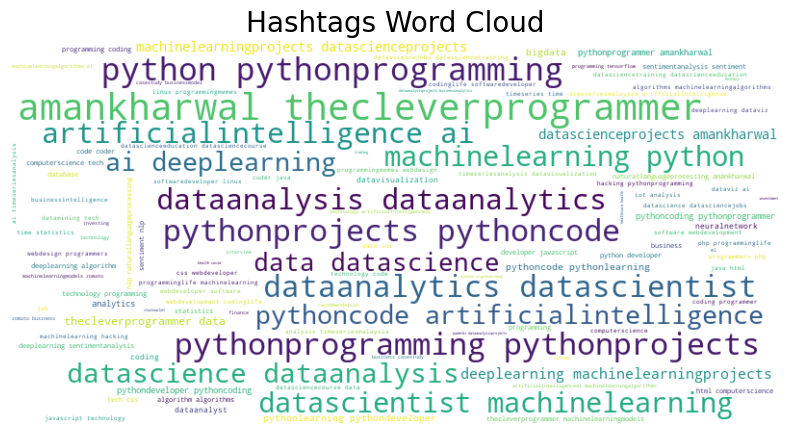

In [10]:
# Create a word cloud for the hashtags used in the Instagram posts

# Combine all hashtags into a single string
hashtags = ' '.join(data['Hashtags'].astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(hashtags)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title('Hashtags Word Cloud', fontsize=20)
plt.show()

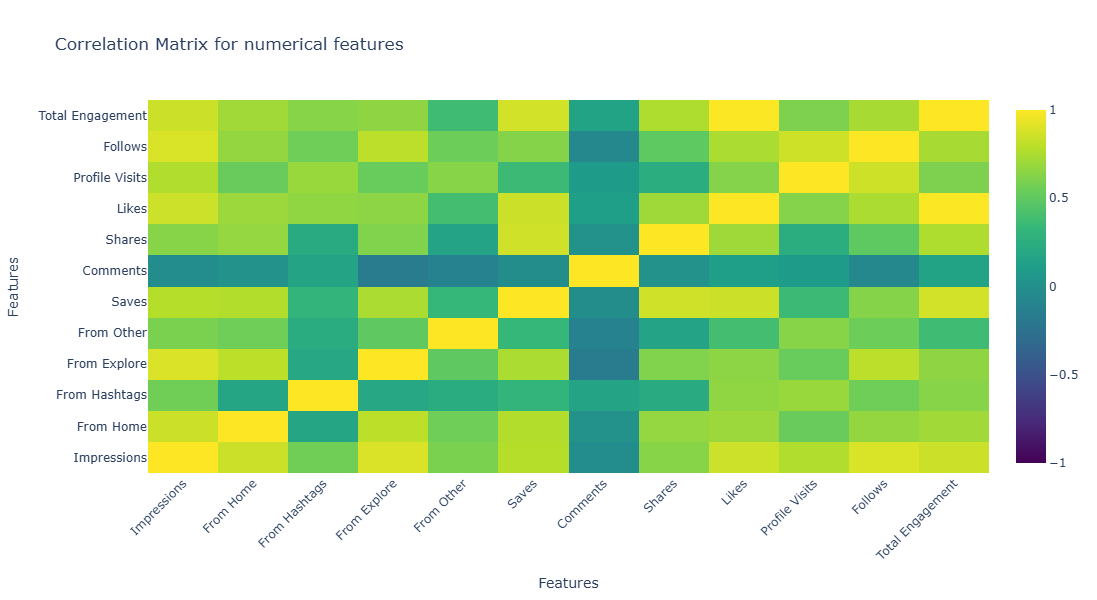

In [54]:
# Create a correlation matrix heatmap to visualize the relationships (correlations) between different numerical features in your dataset.

# Select only numerical columns
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numerical_data.corr()

# Create the heatmap
fig = go.Figure(data=go.Heatmap(
    z=corr_matrix.values,  # Correlation values
    x=corr_matrix.columns,  # Feature names for the x-axis
    y=corr_matrix.index,    # Feature names for the y-axis
    colorscale='Viridis',      # Color scale (red to blue)
    zmin=-1,                # Minimum value for the color scale
    zmax=1,                  # Maximum value for the color scale
    text=corr_matrix.values.round(2),  # Add annotations
    hoverinfo='text'  # Show annotations on hover
))

# Update layout
fig.update_layout(
    title='Correlation Matrix for numerical features',  # Title of the plot
    xaxis_title='Features',      # Label for the x-axis
    yaxis_title='Features',       # Label for the y-axis
    xaxis_tickangle=-45,  # Rotate x-axis labels by 45 degrees
    width=800,  # Set the width of the plot
    height=600  # Set the height of the plot
)

# Display the heatmap
fig.show()

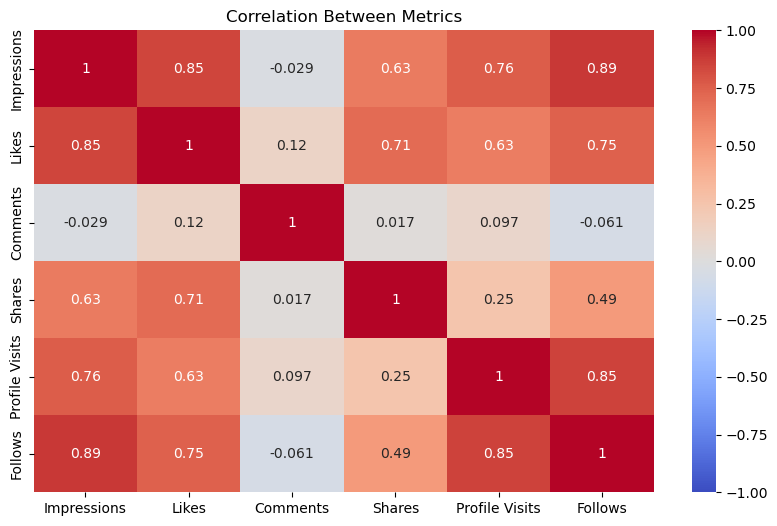

In [12]:
# Create a correlation matrix heatmap to xplore the relationships between different metrics (e.g., impressions, likes, comments, shares) to identify patterns.

# Calculate the correlation matrix
corr_matrix = data[['Impressions', 'Likes', 'Comments', 'Shares', 'Profile Visits', 'Follows']].corr()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between Metrics')
plt.show()

In [15]:
# Create a bar chart that visualizes the distribution of the top 25 hashtags used in the Instagram posts.

# Create a list to store all hashtags
all_hashtags = []

# Iterate through each row in the 'Hashtags' column
for row in data['Hashtags']:
    hashtags = str(row).split()  # Split the hashtags string into a list
    hashtags = [tag.strip() for tag in hashtags]  # Remove any extra spaces
    all_hashtags.extend(hashtags)  # Add the hashtags to the list

# Create a pandas DataFrame to store the hashtag distribution
hashtag_distribution = pd.Series(all_hashtags).value_counts().reset_index() # Count the frequency of each hashtag & reset the index
hashtag_distribution.columns = ['Hashtag', 'Count'] # Rename the columns to 'Hashtag' and 'Count'

# Sort by count in descending order
hashtag_distribution = hashtag_distribution.sort_values(by='Count', ascending=False)

# Get the top 25 hashtags
top_hashtags = hashtag_distribution.head(25)

# Create a bar chart
fig = px.bar(top_hashtags, 
             x='Hashtag',  # X-axis: Hashtags
             y='Count',    # Y-axis: Frequency of hashtags
             title='Top 25 Distribution of Hashtags (sorted)')  # Title of the plot

# Display the bar chart
fig.show()

In [16]:
# Create two bar charts to visualize the distribution of top 25 Likes and Impressions for each hashtag used.

# Create a dictionary to store the likes and impressions for each hashtag
hashtag_likes = {}
hashtag_impressions = {}

# Iterate through each row in the dataset
for index, row in data.iterrows():
    hashtags = str(row['Hashtags']).split()  # Split the hashtags string into a list
    for hashtag in hashtags:
        hashtag = hashtag.strip()  # Remove any extra spaces
        if hashtag not in hashtag_likes:
            hashtag_likes[hashtag] = 0
            hashtag_impressions[hashtag] = 0
        hashtag_likes[hashtag] += row['Likes']  # Add likes for the hashtag
        hashtag_impressions[hashtag] += row['Impressions']  # Add impressions for the hashtag

# Create a DataFrame for likes distribution
likes_distribution = pd.DataFrame(list(hashtag_likes.items()), columns=['Hashtag', 'Likes'])
# Sort by likes in descending order
likes_distribution = likes_distribution.sort_values(by='Likes', ascending=False)
# Get the top 25 hashtags for likes
top_likes = likes_distribution.nlargest(25, 'Likes')

# Create a DataFrame for impressions distribution
impressions_distribution = pd.DataFrame(list(hashtag_impressions.items()), columns=['Hashtag', 'Impressions'])
# Sort by impressions in descending order
impressions_distribution = impressions_distribution.sort_values(by='Impressions', ascending=False)
# Get the top 25 hashtags for impressions
top_impressions = impressions_distribution.nlargest(25, 'Impressions')

# Create a bar chart for likes distribution
fig_likes = px.bar(top_likes, 
                   x='Hashtag',  # X-axis: Hashtags
                   y='Likes',    # Y-axis: Total likes
                   title='Top 25 Likes Distribution for Each Hashtag (sorted)')  # Title of the plot

# Create a bar chart for impressions distribution
fig_impressions = px.bar(top_impressions, 
                         x='Hashtag',  # X-axis: Hashtags
                         y='Impressions',  # Y-axis: Total impressions
                         title='Top 25 Impressions Distribution for Each Hashtag (sorted)')  # Title of the plot

# Display the bar charts
fig_likes.show()
fig_impressions.show()

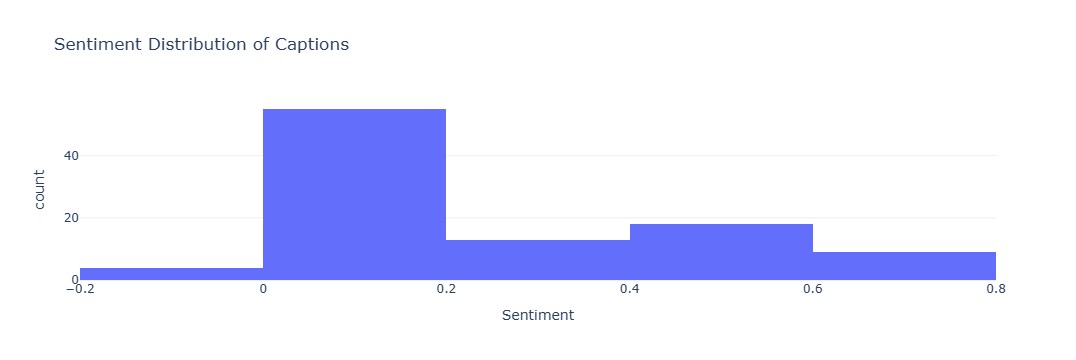

In [62]:
# Create a histogram to to analyze the sentiment of the captions

# Function to calculate sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis to captions
data['Sentiment'] = data['Caption'].apply(get_sentiment)

# Create a histogram of sentiment scores
fig = px.histogram(data, 
                   x='Sentiment', 
                   title='Sentiment Distribution of Captions')
fig.show()

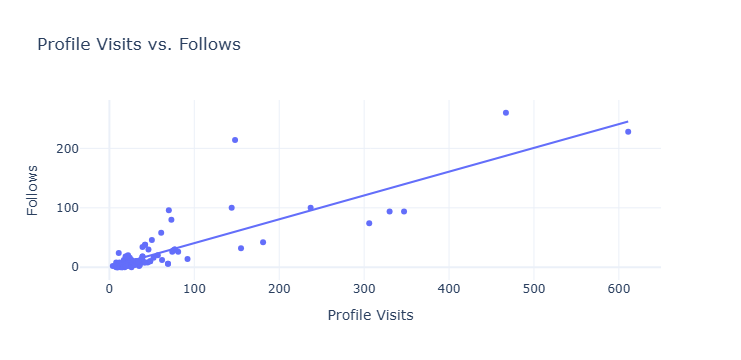

In [8]:
# Use a scatterplot to analyze the relationship between profile visits and new followers

# Create a scatter plot with a trendline
fig = px.scatter(data, 
                 x='Profile Visits', 
                 y='Follows', 
                 trendline='ols', 
                 title='Profile Visits vs. Follows')
fig.show()

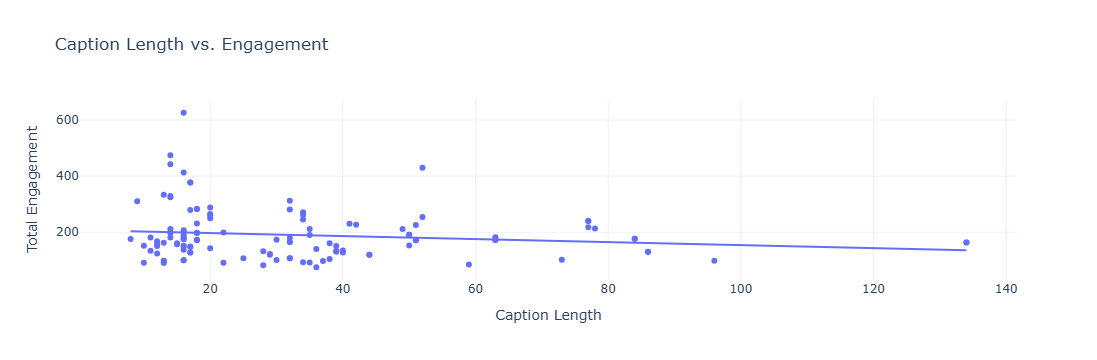

In [70]:
# Use a scatterplot to analyze how the length of your captions (number of words or characters) affects engagement.

# Calculate caption length
data['Caption Length'] = data['Caption'].apply(lambda x: len(str(x).split()))

# Create a scatter plot to analyze caption length vs. engagement
fig = px.scatter(data, 
                 x='Caption Length', 
                 y='Total Engagement', 
                 trendline='ols', 
                 title='Caption Length vs. Engagement')
fig.show()